In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a numerical column with some outliers
data = {
    "salary": [35000, 42000, 50000, 58000, 61000, 1000000, 45000, 47000, 48000, 2000000]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

Original Dataset:
    salary
0    35000
1    42000
2    50000
3    58000
4    61000
5  1000000
6    45000
7    47000
8    48000
9  2000000


Visualize Outliers with Box Plot

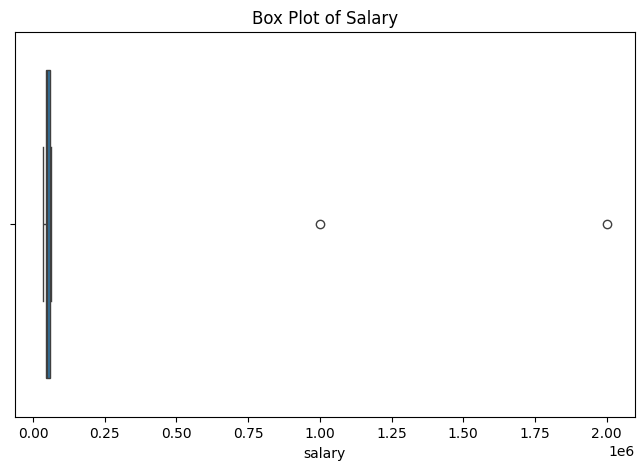

In [2]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['salary'])
plt.title("Box Plot of Salary")
plt.show()


Calculate IQR

In [3]:
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


Q1: 45500.0, Q3: 60250.0, IQR: 14750.0


Define Outlier Boundaries

In [4]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 23375.0, Upper Bound: 82375.0


Identify Outliers

In [5]:
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print("Outliers in the dataset:")
print(outliers)


Outliers in the dataset:
    salary
5  1000000
9  2000000


Handle Outliers (Capping)

In [6]:
# Cap values at the boundaries
df.loc[df['salary'] < lower_bound, 'salary'] = lower_bound
df.loc[df['salary'] > upper_bound, 'salary'] = upper_bound

print("Dataset After Handling Outliers:")
print(df)


Dataset After Handling Outliers:
   salary
0   35000
1   42000
2   50000
3   58000
4   61000
5   82375
6   45000
7   47000
8   48000
9   82375


Verify with a Box Plot

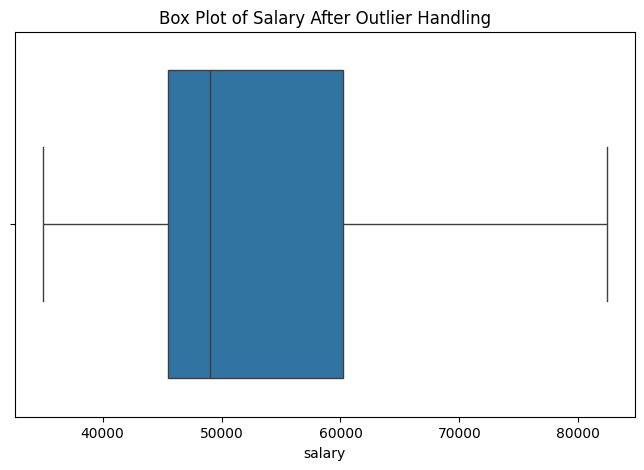

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['salary'])
plt.title("Box Plot of Salary After Outlier Handling")
plt.show()
